# 4조 (팀이름: 4달러)

#### 팀 주 제 : 미국 금리 변동이 한국경제에 미치는 영향 분석

### 개인주제 : 주요 경제지표가 한국경제에 미치는 영향 분석(곽성화)

#### 자료시점 : 2019년 1월 ~ 2022년 6월

In [267]:
# 모듈 로딩 -------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

# 0. DF 생성 및 데이터 전처리

### 1) 소비자물가지수 data

In [405]:
cpiDF=pd.read_csv('소비자물가지수.csv', encoding='euc_kr')

# 자료 확인
cpiDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도별     42 non-null     object 
 1   시점      42 non-null     float64
 2   데이터     42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.1+ KB


In [406]:
# 날짜 자료형 float 변환 필요 (10월의 경우 0이 잘림)
cpiDF['시점']=cpiDF['시점'].astype('str')
change={'1':'10'}
year_month=cpiDF['시점'].apply(lambda x:x.split('.'))
year_month=pd.DataFrame(year_month.tolist(),columns=('연','월'))
year_month['월']=year_month['월'].apply(lambda x:change.get(x,x))

# 데이터 합치기
cpiDF=pd.concat([cpiDF,year_month], axis=1, join='inner')

# 컬럼명 변경
cpiDF.rename(columns={'데이터':'CPI'},inplace=True)

# 필요하지 않은 열 삭제
cpiDF.drop(['시도별','시점'], axis=1, inplace=True)

In [408]:
# 날짜 열 추가
cpiDF['시점']=cpiDF['연']+'-'+cpiDF['월']

# 날짜를 인덱스로 설정
cpiDF=cpiDF.set_index(cpiDF['시점'])

### 2) 주가 data

In [412]:
# csv 파일 -> DF 객체 생성
kospiDF=pd.read_csv('kospi_month.csv', encoding='utf-8')
kosdaqDF=pd.read_csv('kosdaq_month.csv', encoding='utf-8')

# 컬럼명 변경
kospiDF.rename(columns={'종가':'KOSPI'},inplace=True)
kosdaqDF.rename(columns={'종가':'KOSDAQ'},inplace=True)

# 날짜 연-월-일 분리
kospi_list=kospiDF['날짜'].str.split('-')
kospiDF['연']=kospi_list.str.get(0)
kospiDF['월']=kospi_list.str.get(1)

kosdaq_list=kosdaqDF['날짜'].str.split('-')
kosdaqDF['연']=kosdaq_list.str.get(0)
kosdaqDF['월']=kosdaq_list.str.get(1)

In [415]:
# 날짜를 인덱스로 설정
kospiDF=kospiDF.set_index(kospiDF['날짜'])
kosdaqDF=kosdaqDF.set_index(kosdaqDF['날짜'])

### 3) 환율 data

In [418]:
# csv 파일 -> DF 객체 생성
dollarDF=pd.read_csv('월별 환율 평균.csv', encoding='utf-8')

# 날짜 자료형 float 변환 필요 (10월의 경우 0이 잘림)
dollarDF['기간']=dollarDF['기간'].astype('str')
change={'1':'10'}
year_month=dollarDF['기간'].apply(lambda x:x.split('.'))
year_month=pd.DataFrame(year_month.tolist(),columns=('연','월'))
year_month['월']=year_month['월'].apply(lambda x:change.get(x,x))

# 데이터 합치기
dollarDF=pd.concat([dollarDF,year_month], axis=1, join='inner')

# 필요하지 않은 열 삭제
dollarDF.drop(['Unnamed: 0','기간'], axis=1, inplace=True)

# 날짜 열 추가
dollarDF['날짜']=dollarDF['연']+'-'+dollarDF['월']

# 날짜를 인덱스로 설정
dollarDF=dollarDF.set_index(dollarDF['날짜'])

### 4) 수출입 data

In [425]:
# csv 파일 -> DF 객체 생성
tradeDF=pd.read_excel('수출입총괄.xls',skiprows=4)

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,기간,수출건수,수출금액,수입건수,수입금액,무역수지
0,총계,"43,609,811","2,049,586,176","116,422,433","1,946,880,328","102,705,848"
1,2019.01,"724,445","46,168,934","2,121,240","45,153,389","1,015,545"
2,2019.02,"621,348","39,481,803","1,748,298","36,651,437","2,830,366"
3,2019.03,"754,196","47,003,206","2,183,681","41,992,349","5,010,857"
4,2019.04,"791,438","48,781,156","2,188,788","45,047,164","3,733,992"


In [426]:
# 데이터 콤마 제거후 숫자로 변경 
for col in tradeDF.columns[1:]:
    for i in range(tradeDF.shape[0]):
        tradeDF[col][i]=tradeDF[col][i].replace(',','')
    tradeDF[col] = pd.to_numeric(tradeDF[col])

# 기간 컬럼 형태 변경
for i in range(tradeDF.shape[0]):
    tradeDF['기간'][i]=tradeDF['기간'][i].replace('.','-')
    
# 필요없는 행/열 제거
tradeDF=tradeDF.drop(0).reset_index(drop=True)
tradeDF=tradeDF[tradeDF.columns[[0,2,4]]]

C:\Users\User\AppData\Local\Temp\ipykernel_16992\4261388757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradeDF[col][i]=tradeDF[col][i].replace(',','')
C:\Users\User\AppData\Local\Temp\ipykernel_16992\4261388757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradeDF['기간'][i]=tradeDF['기간'][i].replace('.','-')


In [427]:
# 날짜를 인덱스로 설정
tradeDF=tradeDF.set_index(tradeDF['기간'])

# 1. 소비자물가지수에 대한 기본통계

### 소비자물가지수(CPI)란?

- 가구에서 일상소비생활을 유지하기 위해 구입하는 상품과 서비스의 가격변동을 종합적으로 반단하기 위해 작성하는 물가지수
- 기준년도(2020년)를 100으로 설정
- 소비자물가지수의 상승은 실질임금의 하락을 의미 -> 임금인상 기초자료로 사용됨

In [114]:
a=cpiDF['CPI']
print(f'소비자물가지수 평균 => {round(a.mean())}')
print(f'소비자물가지수 최대 시점 => {a.idxmax()}, {a.max()}')
print(f'소비자물가지수 최소 시점 => {a.idxmin()}, {a.min()}')

소비자물가지수 평균 => 101
소비자물가지수 최대 시점 => 2022-06, 108.22
소비자물가지수 최소 시점 => 2019-01, 98.884


In [212]:
# 물가상승률
inflation_y=a[len(cpiDF)-1]-a[len(cpiDF)-13]
inflation_m=a[len(cpiDF)-1]-a[len(cpiDF)-2]

print(f'2022년 6월 물가상승률 => 전년동월대비 {inflation_y:.1f}% 인상')
print(f'2022년 6월 물가상승률 => 전월대비 {inflation_m:.1f}% 인상')

2022년 6월 물가상승률 => 전년동월대비 6.2% 인상
2022년 6월 물가상승률 => 전월대비 0.7% 인상


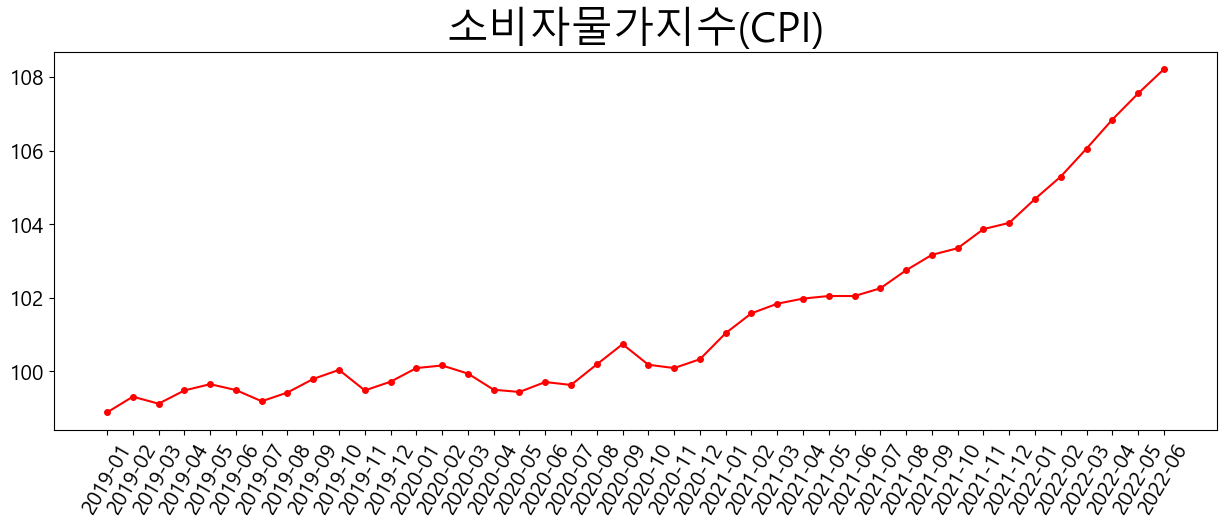

In [471]:
# 그래프로 시각화
plt.figure(dpi=100, figsize=(15,5))
plt.plot(cpiDF['시점'], cpiDF['CPI'], 'ro-', ms = 4)
plt.title('소비자물가지수(CPI)', fontdict={'fontsize': 30})
plt.xticks(cpiDF['시점'], rotation=60, size=15)
plt.yticks(size=15)
plt.show()

### 중간 결론
조사한 기간 중 소비자 물가지수(CPI)가 최소인 시점은 2019년 1월 98.88이며, 

소비자 물가지수(CPI)가 최대인 시점은 2022년 6월 108.22입니다.

2020년 11월 이후 소비자물가지수는 계속 상승하는 추세이며, `

전년대비 물가상승률은 6.2%입니다.

# 2. 통합데이터 상관성 분석

In [449]:
# 데이터 합치기
total=pd.concat([cpiDF,kospiDF,kosdaqDF,dollarDF,tradeDF], axis=1, join='inner')

In [461]:
# 필요한 데이터만 추림
totalDF=total[['시점','CPI','KOSPI','KOSDAQ','환율','수입금액','수출금액']]

# 데이터 정규화
normal_DF = (totalDF - totalDF.mean())/totalDF.std()

In [452]:
# 경제지표별 상관계수 확인
totalDF.corr()

,CPI,KOSPI,KOSDAQ,환율,수입금액,수출금액
CPI,1.000000,0.570919,0.590874,0.436492,0.898670,0.836292
KOSPI,0.570919,1.000000,0.961557,-0.377210,0.626671,0.686341
KOSDAQ,0.590874,0.961557,1.000000,-0.317134,0.621962,0.687845
환율,0.436492,-0.377210,-0.317134,1.000000,0.252840,0.111596
수입금액,0.898670,0.626671,0.621962,0.252840,1.000000,0.951354
수출금액,0.836292,0.686341,0.687845,0.111596,0.951354,1.000000


### 주요 경제지표와 소비자물가지수(CPI)의 상관관계를 살펴보면, 
<b>수입(0.90), 수출(0.84)</b>, KOSDAQ(0.59), KOSPI(0.57), 환율(0.44) 순으로 상관관계가 높게 나타났습니다.

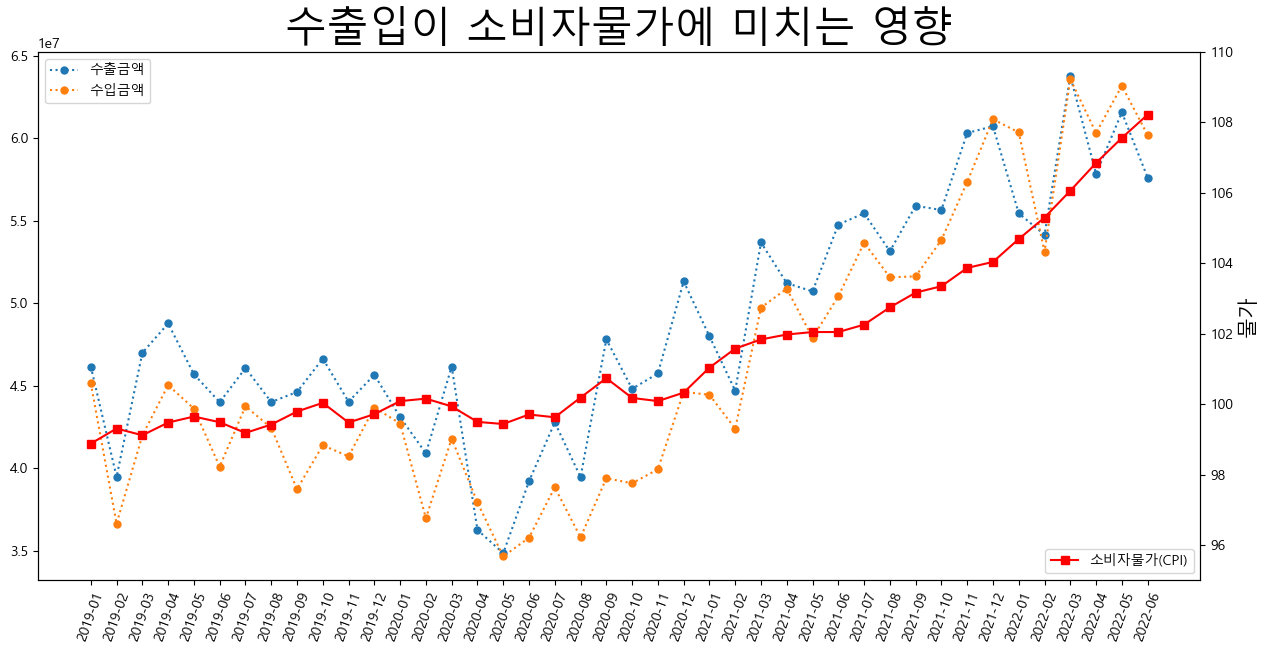

In [479]:
# 그래프에 사용하기 위해 dataframe에서 list 추출
cpi_list = normal_DF['CPI'].to_list()
kospi_list = normal_DF['KOSPI'].to_list()
month = totalDF['시점']

# 그래프로 시각화
plt.figure(dpi=100, figsize=(15,7))
plt.title('수출입이 소비자물가에 미치는 영향', fontdict={'fontsize': 30})
plt.xticks(rotation=70)

# plt.plot(month, totalDF['KOSPI'], 'o--', label='KOSPI', ms = 5)
# plt.plot(month, totalDF['KOSDAQ'], 'o--', label='KOSDAQ', ms = 5)
plt.plot(month, totalDF['수출금액'], 'o:', label='수출금액', ms = 5)
plt.plot(month, totalDF['수입금액'], 'o:', label='수입금액', ms = 5)
plt.legend(loc=2)  

y_right=plt.twinx()
y_right.plot(month, totalDF['CPI'],label='소비자물가(CPI)',color='red',marker='s')
plt.ylabel('물가',size=15)  #오른쪽 Y축 이름
y_right.legend(loc=4)
plt.ylim(95, 110)  # 보조축 범위지정

plt.show()

수출입 금액이 2020년 5월 이후 전반적으로 상승하는 추세를 보이며, 
소비자물가지수 또한 비슷한 추세를 보이므로 
우리나라의 경우 수출입의 의존도가 높은 편이라고 말할 수 있음.

# <span style='color:Blue'> [결론]   </span>
앞선 팀원들의 발표에서 미국 금리 변화가 한국경제에 미치는 영향을 보았으며, 특히 주식 및 가계부채가 밀접한 관계가 있었습니다.    
또한, 소비자물가지수에는 수출입이 영향을 많이 주었다는 것을 확인하였습니다.

1. 물가는 수요와 공급에 의해 등락이 결정되므로, 수입과 수출이 소비자물가에 많은 영향을 준 것으로 사료됩니다.      
코로나19(2020년 1월 이후) 및 러시아-우크라이나 전쟁(2022년 2월 이후) -> 국제원유 등 원부자재 가격 상승 -> 제조업체의 원가 상승 -> 소비자가 구매하는 판매 가격이 함께 상승 -> 소비자물가지수 상승(스테그플레이션 우려)

2. 미국 금리가 상승하면 한국 또한 외화유출 등을 고려하여 금리를 상승하는 경향이 있습니다.      
금리(이자) 상승 -> 부채(기업/가계) 부담이 커짐 -> 투자 감소 및 경기 둔화, 소비 위축 -> 소비자물가지수 상승(인플레이션 우려)

### 소비자물가지수가 계속 상승한다면 인플레이션은 물론, 
물가는 오르나 경기는 침체되는 스태그플레이션이 발생할 수 있으므로     
향후 금리 상승에 대한 대비가 필요할 것입니다.

### 자료 출처
* 소비자물가지수 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20003&conn_path=I2
* 주    가 : http://data.krx.co.kr/
* 환    율 : https://ecos.bok.or.kr/
* 수출입 : https://unipass.customs.go.kr/ets/